<a href="https://colab.research.google.com/github/vedantdave77/project.Orca/blob/master/Generative%20Adversarial%20Networks/Cycle_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cycle GAN - Image to Image translation

AIM: Here, I will generate new natural image with Cycle GAN. The data is taken from Yosemite National Park in different seasons. 

The objective will be to train generators that learn to transform an image from domain $X$ into an image that looks like it came from domain $Y$ (and vice versa).



## Concept: Unpaired Data

The dataset images have no labels so it will be unsupervised machine learning problem. A cycle GAN is specially designed to image to image translation and it learn from **unpaired data**, that means we do not need any direct relationship between individual image to specific domain. (desired output domain)

For example, inthe papaer **"Unpaired Image-to-Image Translation
using Cycle-Consistent Adversarial Networks"**, researcher can convert horse to zebra with background change.

## Load and Visualize data

In [4]:
import os
import torch
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
% matplotlib inline 

import numpy as np
import warnings


## DataLoaders

Generate dataloader for train and test dataset. Prepare datasets.

In [13]:
def get_data_loader(image_type, image_dir = '/content/drive/My Drive/summer2winter_yosemite', image_size = 128, batch_size = 16, num_workers = 0):
  transform = transforms.Compose([transforms.Resize(image_size),transforms.ToTensor()])
  image_path = image_dir
  train_path = os.path.join(image_path, image_type)
  test_path = os.path.join(image_path, 'test_{}'.format(image_type))

  # generate datasets
  train_dataset = datasets.ImageFolder(train_path, transform)
  test_dataset = datasets.ImageFolder(test_path, transform)
   
  # generate loaders 
  train_loader = DataLoader(dataset= train_dataset, batch_size = batch_size, shuffle=True, num_workers = num_workers)
  test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True, num_workers = num_workers)

  return train_loader, test_loader

In [14]:
# create datasets for two domains
dataloader_X, test_dataloader_X = get_data_loader(image_type = 'summer')
dataloader_Y, test_dataloader_Y = get_data_loader(image_type = 'winter')

## Display images for reference 

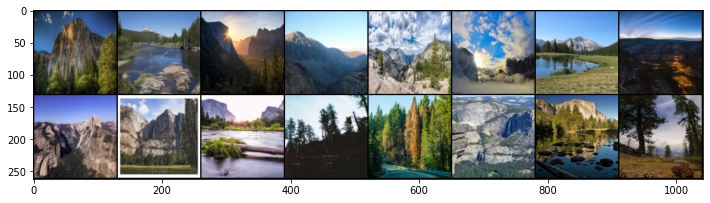

In [15]:
def imshow(img):
  img = img.numpy()
  plt.imshow(np.transpose(img,(1,2,0)))

dataiter = iter(dataloader_X)
images,_ = dataiter.next()

fig = plt.figure(figsize= (12,8))
imshow(torchvision.utils.make_grid(images))

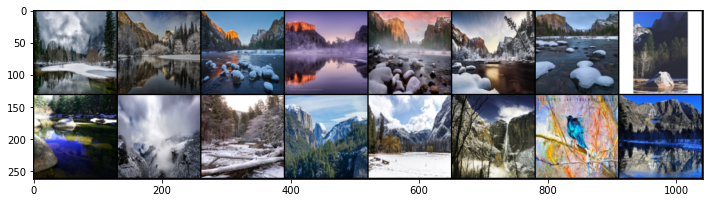

In [16]:
# now, get images from y domain
dataiter =iter(dataloader_Y)
images,_ = dataiter.next()

# show images
fig = plt.figure(figsize = (12,8))
imshow(torchvision.utils.make_grid(images))

## Preprocessing

Scaling form (-1,1). 

In [18]:
image = images[0]

print("Min: ", image.min())
print("Max: ",image.max())

Min:  tensor(0.0039)
Max:  tensor(1.)


In [19]:
# convert image scale
def scale(x,feature_range = (-1,1)):
  min, max = feature_range
  x = x* (max-min) + min
  return x

In [21]:
# image conversion
scaled_image = scale(image)

print("Scaled Image Min: ", scaled_image.min())
print("Scaled Image Max: ", scaled_image.max())


Scaled Image Min:  tensor(-0.9922)
Scaled Image Max:  tensor(1.)


## Define Model